### Fase 2 - Análise de Dados de Jogos da Steam

Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Carregando e Limpando os dados

In [2]:
# Carregar os dados
df = pd.read_csv('../data/steam_games.csv')

# Visualizando as primeiras linhas para verificar o formato dos dados
print(df.head())

# Verificando informações gerais sobre o DataFrame
print(df.info())

# Removendo linhas com dados faltantes em colunas essenciais
df = df.dropna(subset=['Name', 'Metacritic score', 'Release date', 'Genres', 'DLC count', 'Positive', 'Negative', 'Screenshots', 'Movies', 'Price', 'Publishers', 'Windows', 'Mac', 'Linux'])

# Corrigir valores incorretos (por exemplo, remover espaços extras ou valores inconsistentes)
# df['Windows'] = df['Windows'].str.strip().map({'True': True, 'False': False})
# df['Mac'] = df['Mac'].str.strip().map({'True': True, 'False': False})
# df['Linux'] = df['Linux'].astype(bool)  # Garantindo que 'Linux' seja booleano

# Convertendo colunas relevantes para os tipos corretos
#df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
#df['Metacritic score'] = pd.to_numeric(df['Metacritic score'], errors='coerce')

# Corrigir valores ausentes ou inválidos nas colunas numéricas
#df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)  # Preencher valores ausentes com 0
#df['Positive'] = pd.to_numeric(df['Positive'], errors='coerce').fillna(0)  # Preencher valores ausentes com 0

# Remover duplicatas, se houver
df = df.drop_duplicates(subset=['Name', 'Metacritic score', 'Release date'])

# Visualizar as primeiras linhas após a limpeza
print(df.head())

     AppID                   Name  Release date Estimated owners  Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000         0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000         0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a 

Pergunta 1: Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic? No caso de notas repetidas, ordenar os jogos de acordo com suas datas de lançamento (do mais velho para o mais recente).

In [3]:
top10_games = df.sort_values(by=['Metacritic score', 'Release date'], ascending=[False, True]).head(10)
print(top10_games[['Name', 'Metacritic score', 'Release date']])

                                                    Name  Metacritic score  \
45752                      Disco Elysium - The Final Cut                97   
64935                                    Persona 5 Royal                97   
36775                                        Half-Life 2                96   
57205                                 Grand Theft Auto V                96   
28170                                           Portal 2                95   
37184                                              QUAKE                94   
60132  The Elder Scrolls IV: Oblivion® Game of the Ye...                94   
10646                        The Elder Scrolls V: Skyrim                94   
21910                                  BioShock Infinite                94   
36598          Divinity: Original Sin - Enhanced Edition                94   

      Release date  
45752   2019-10-15  
64935   2022-10-20  
36775   2004-11-16  
57205   2015-04-13  
28170   2011-04-18  
37184   2007-08

Pergunta 2: Para jogos de role-playing, qual o número médio e máximo de: DLCs, avaliações positivas, avaliações negativas e materiais de demonstração (número de capturas de tela e filmes, somados)?

In [9]:
# Filtrando jogos do gênero 'Role-Playing'
df_rpg = df[df['Genres'].str.contains('RPG', na=False)].copy()

# Contando o número de URLs em 'Screenshots' e 'Movies'
df_rpg['Screenshots'] = df_rpg['Screenshots'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
df_rpg['Movies'] = df_rpg['Movies'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Calculando o número médio e máximo de DLCs, avaliações positivas, negativas e materiais de demonstração
average_dlc = df_rpg['DLC count'].mean()
max_dlc = df_rpg['DLC count'].max()

average_positive_reviews = df_rpg['Positive'].mean()
max_positive_reviews = df_rpg['Positive'].max()

average_negative_reviews = df_rpg['Negative'].mean()
max_negative_reviews = df_rpg['Negative'].max()

# Calculando o número de materiais de demonstração (capturas de tela + filmes)
df_rpg['Demo Materials'] = df_rpg['Screenshots'] + df_rpg['Movies']

average_demo_materials = df_rpg['Demo Materials'].mean()
max_demo_materials = df_rpg['Demo Materials'].max()

# Exibindo os resultados
print(f"Número médio de DLCs: {average_dlc:.2f}")
print(f"Número máximo de DLCs: {max_dlc}")
print(f"Número médio de avaliações positivas: {average_positive_reviews:.2f}")
print(f"Número máximo de avaliações positivas: {max_positive_reviews}")
print(f"Número médio de avaliações negativas: {average_negative_reviews:.2f}")
print(f"Número máximo de avaliações negativas: {max_negative_reviews}")
print(f"Número médio de materiais de demonstração (capturas de tela + filmes): {average_demo_materials:.2f}")
print(f"Número máximo de materiais de demonstração (capturas de tela + filmes): {max_demo_materials}")


Número médio de DLCs: 0.99
Número máximo de DLCs: 2366
Número médio de avaliações positivas: 1520.91
Número máximo de avaliações positivas: 964983
Número médio de avaliações negativas: 249.40
Número máximo de avaliações negativas: 129925
Número médio de materiais de demonstração (capturas de tela + filmes): 11.45
Número máximo de materiais de demonstração (capturas de tela + filmes): 187


Pergunta 3: Quais são as cinco empresas que mais publicam jogos pagos na plataforma? Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?

In [15]:
# Filtrando jogos pagos
paid_games = df[df['Price'] > 0].copy()

# Contando o número de jogos pagos por empresa
publisher_counts = paid_games['Publishers'].value_counts()

# Selecionando as cinco empresas que mais publicaram jogos pagos
top_5_publishers = publisher_counts.head(5).index

# Filtrando jogos pagos pelas top 5 empresas
top_5_paid_games = paid_games[paid_games['Publishers'].isin(top_5_publishers)]

# Calculando o número médio e mediano de avaliações positivas para cada uma das top 5 empresas
average_positive_reviews_by_publisher = top_5_paid_games.groupby('Publishers')['Positive'].mean().sort_values(ascending=False)
median_positive_reviews_by_publisher = top_5_paid_games.groupby('Publishers')['Positive'].median().sort_values(ascending=False)

# Exibindo os resultados
print("As cinco empresas que mais publicam jogos pagos:")
for i, publisher in enumerate(top_5_publishers, 1):
    print(f"{i} {publisher}")

print("\nNúmero médio de avaliações positivas para jogos pagos (ordenado do maior para o menor):")
for publisher, avg in average_positive_reviews_by_publisher.items():
    print(f"{publisher}: {avg:.2f}")

print("\nNúmero mediano de avaliações positivas para jogos pagos (ordenado do maior para o menor):")
for publisher, median in median_positive_reviews_by_publisher.items():
    print(f"{publisher}: {median:.2f}")


As cinco empresas que mais publicam jogos pagos:
1 Big Fish Games
2 8floor
3 Laush Studio
4 HH-Games
5 Sekai Project

Número médio de avaliações positivas para jogos pagos (ordenado do maior para o menor):
Sekai Project: 684.14
Laush Studio: 19.78
HH-Games: 10.29
Big Fish Games: 6.34
8floor: 4.46

Número mediano de avaliações positivas para jogos pagos (ordenado do maior para o menor):
Sekai Project: 71.50
Laush Studio: 12.00
HH-Games: 9.00
Big Fish Games: 4.00
8floor: 3.00


Pergunta 4: O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?

In [16]:
# Filtrando jogos que foram lançados entre 2018 e 2022
linux_support_games = df[(df['Release date'].dt.year >= 2018) & (df['Release date'].dt.year <= 2022)]

# Filtrando apenas jogos que suportam Linux
linux_support_games = linux_support_games[linux_support_games['Linux'] == True]

# Contando o número de jogos que suportam Linux por ano
linux_games_by_year = linux_support_games['Release date'].dt.year.value_counts().sort_index()

# Exibindo o resultado
print("Número de jogos que suportam o sistema operacional Linux entre 2018 e 2022:")
for year, count in linux_games_by_year.items():
    print(f"{year}: {count} jogos")

Número de jogos que suportam o sistema operacional Linux entre 2018 e 2022:
2018: 1101 jogos
2019: 881 jogos
2020: 1033 jogos
2021: 1173 jogos
2022: 1279 jogos


Pergunta 5: Qual é a relação entre o preço dos jogos e o número de avaliações positivas que eles recebem?

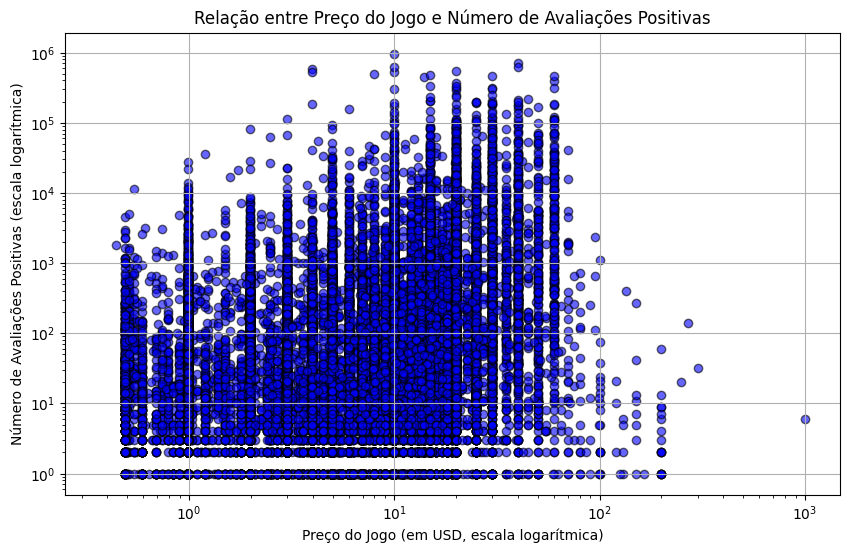

Correlação entre preço do jogo e número de avaliações positivas: 0.09


In [19]:
# Filtrando jogos pagos
paid_games = df[df['Price'] > 0]

# Plotando o gráfico de dispersão com escala logarítmica
plt.figure(figsize=(10, 6))
plt.scatter(paid_games['Price'], paid_games['Positive'], alpha=0.6, color='b', edgecolor='k')

# Ajustando a escala logarítmica
plt.xscale('log')
plt.yscale('log')

# Ajustando os rótulos e título do gráfico
plt.xlabel('Preço do Jogo (em USD, escala logarítmica)')
plt.ylabel('Número de Avaliações Positivas (escala logarítmica)')
plt.title('Relação entre Preço do Jogo e Número de Avaliações Positivas')
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Calculando a correlação entre preço e número de avaliações positivas
correlation = paid_games['Price'].corr(paid_games['Positive'])
print(f"Correlação entre preço do jogo e número de avaliações positivas: {correlation:.2f}")
